## Chirp Input Data

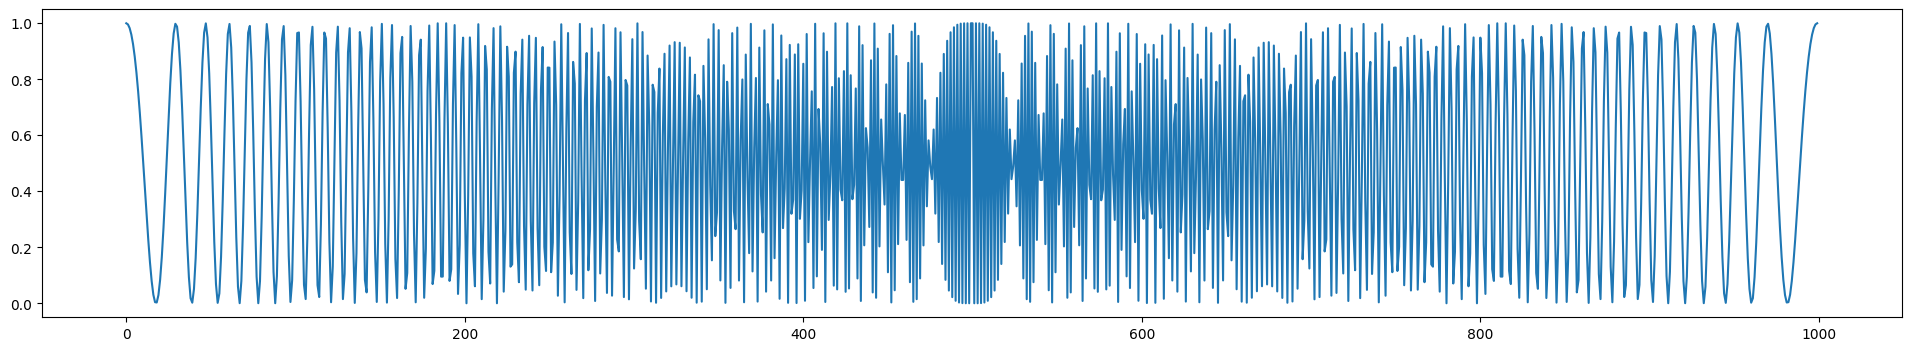

In [1]:
from chirpInputs import getInputData
import matplotlib.pyplot as plt

inputData = getInputData()

plt.figure(figsize=(24,4))
plt.plot(inputData)

## Generate Noise (Salt and Pepper Noise)

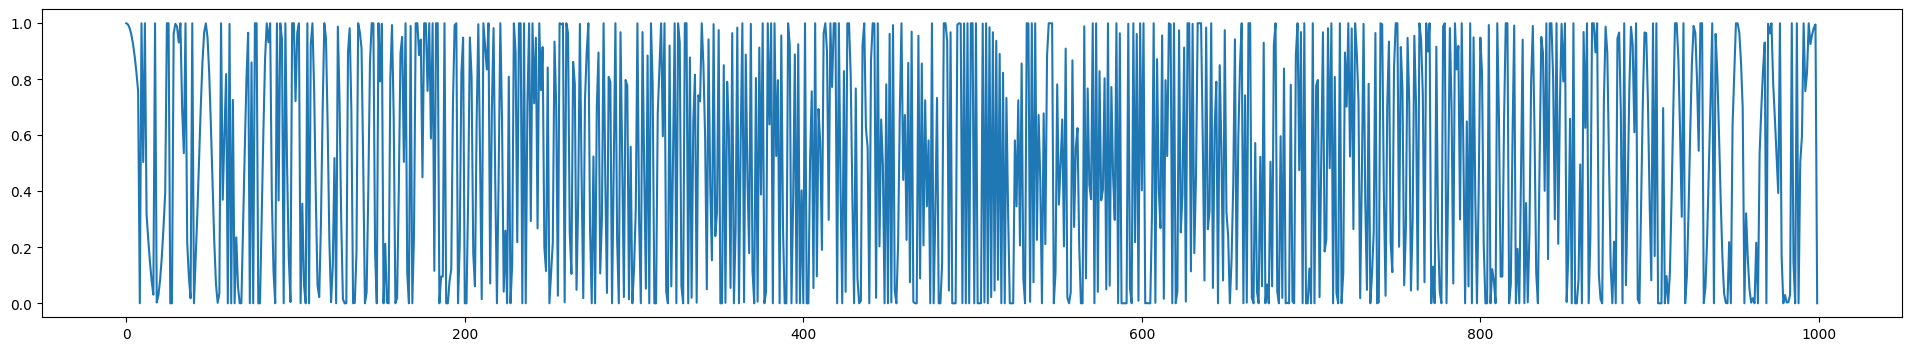

In [28]:
import numpy as np

noise = list(np.random.normal(0,1,1000))
for i in range(len(noise)):
    if noise[i] < -1:
        noise[i] = -1
    elif noise[i] > 1:
        noise[i] = 1
    else:
        noise[i] = 0

noisyData = [0 if noise[i]==-1 else 1 if noise[i]==1 else inputData[i] for i in range(len(inputData))]
plt.figure(figsize=(24,4))
plt.plot(noisyData)


## Moving Average Filter

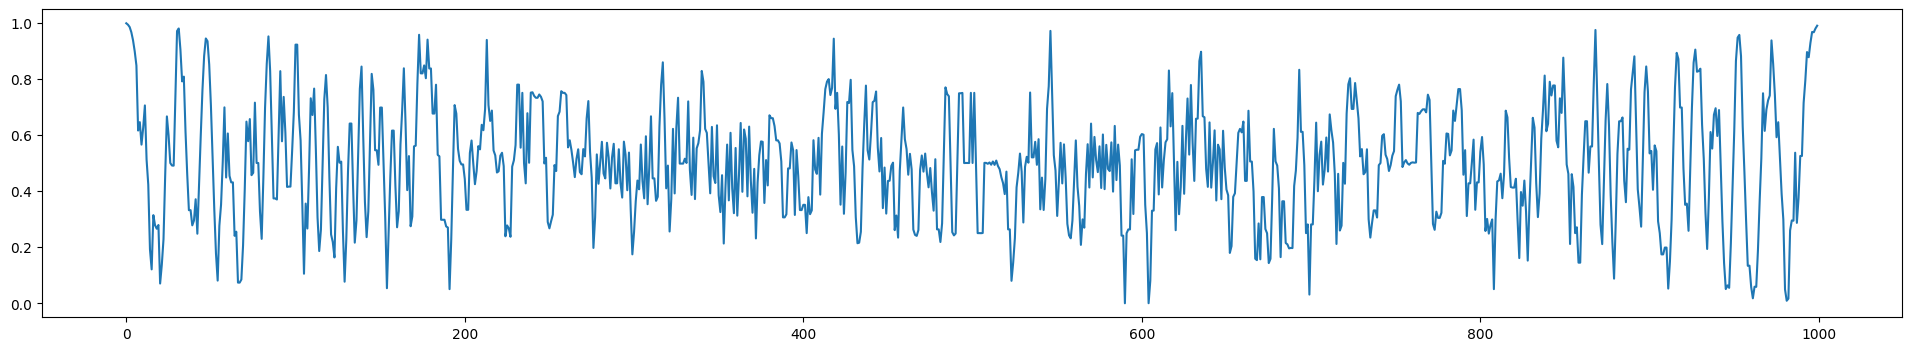

In [34]:
k = 5
y = []
for i in range(len(inputData)):
    s, e = i-k//2, i+k//2
    s, e = s if s>0 else 0, e if e<len(inputData) else len(inputData)-1
    window = noisyData[s:e]
    y.append(sum(window)/len(window))
plt.figure(figsize=(24,4))
plt.plot(y)

## Median Filter


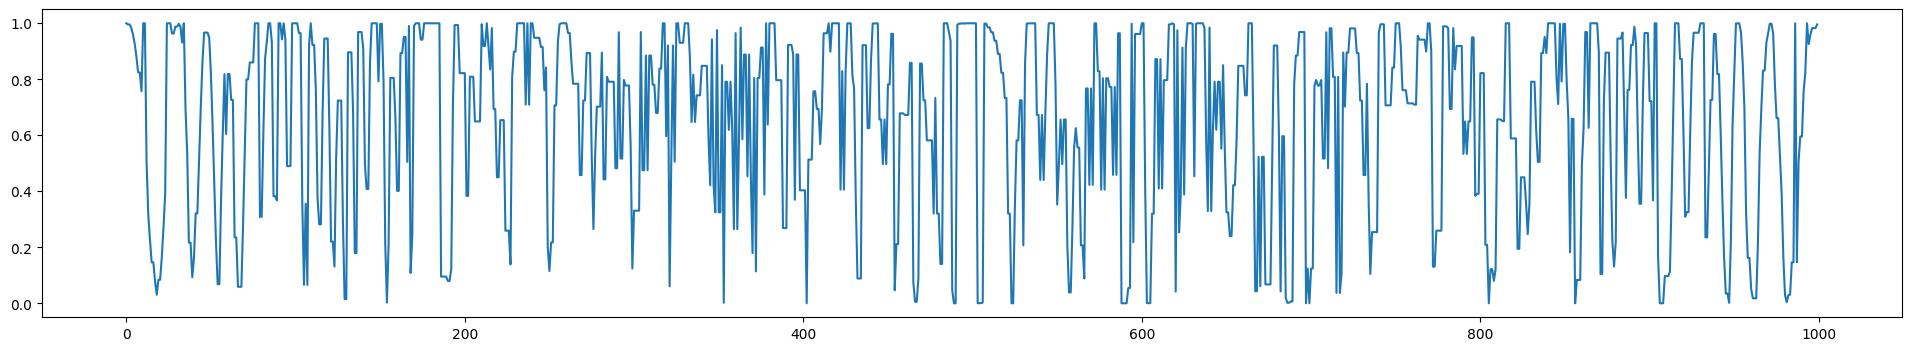

In [37]:
k = 5
y = []
for i in range(len(inputData)):
    s, e = i-k//2, i+k//2
    s, e = s if s>0 else 0, e if e<len(inputData) else len(inputData)-1
    window = noisyData[s:e]
    y.append(sorted(window)[len(window)//2])
plt.figure(figsize=(24,4))
plt.plot(y)

## Adaptive Median Filter

In [ ]:
k = 